In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pydotplus
import tensorflow as tf


In [21]:
lac_2022_df = pd.read_csv("../data/lac_2022_off_clean")
lac_2022_df.head()

,week,OPP,OPP Score,LAC Score,Time,Quarter,Location,yards_to_endzone,Detail,Down,...,pass_incomplete,pass_yards_tally,intercepted,fumble,punt,field goal att,sacked,sack_yards,possession_team,team change
0,1,LVR,0,0,15:00,1,LAC 25,75,Austin Ekeler left tackle for 8 yards (tackle ...,1,...,0,0,0,0,0,0,0,0,LAC,0
1,1,LVR,0,0,14:45,1,LAC 33,67,Justin Herbert pass complete short right to Ke...,2,...,0,0,0,0,0,0,0,0,LAC,0
2,1,LVR,0,0,14:07,1,LAC 34,66,Zander Horvath up the middle for 2 yards (tack...,3,...,0,0,0,0,0,0,0,0,LAC,0
3,1,LVR,0,0,13:24,1,LAC 36,64,Austin Ekeler right tackle for 2 yards (tackle...,1,...,0,0,0,0,0,0,0,0,LAC,0
4,1,LVR,0,0,12:50,1,LAC 38,62,Justin Herbert pass complete short left to Jos...,2,...,0,9,0,0,0,0,0,0,LAC,0


In [22]:
lac_off_df = lac_2022_df.astype({'LAC Score': 'int8', 'OPP Score': 'int8','Down':'int8','Down':'int8','Quarter': 'int8','OPP':'string','week':'int8','rush_length':'int8','yardage_diff_2_3':'int8','yardage_diff_1_2':'int8','ToGo':'int8','rush_length':'int8','pass_length':'int8','1D_conv_good':'int8','2D_conv_good':'int8','3D_conv_good':'int8','3D_conv_good':'int8','4D_conv_good':'int8','rush_play':'int8','rush_yards_tally':'int8','pass_play':'int8','pass_complete':'int8','pass_incomplete':'int8','pass_yards_tally':'int8','intercepted':'int8','fumble':'int8','punt':'int8','field goal att':'int8','sacked':'int8','sack_yards':'int8','team change':'int8','possession_team':'string','Location':'string','Detail':'string','yards_to_endzone':'int8'})
lac_off_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   week              1232 non-null   int8  
 1   OPP               1232 non-null   string
 2   OPP Score         1232 non-null   int8  
 3   LAC Score         1232 non-null   int8  
 4   Time              1232 non-null   object
 5   Quarter           1232 non-null   int8  
 6   Location          1232 non-null   string
 7   yards_to_endzone  1232 non-null   int8  
 8   Detail            1232 non-null   string
 9   Down              1232 non-null   int8  
 10  ToGo              1232 non-null   int8  
 11  yardage_diff_1_2  1232 non-null   int8  
 12  yardage_diff_2_3  1232 non-null   int8  
 13  rush_length       1232 non-null   int8  
 14  pass_length       1232 non-null   int8  
 15  1D_conv_good      1232 non-null   int8  
 16  2D_conv_good      1232 non-null   int8  
 17  3D_conv_good  

In [23]:
lac_off_df.head()

,week,OPP,OPP Score,LAC Score,Time,Quarter,Location,yards_to_endzone,Detail,Down,...,pass_incomplete,pass_yards_tally,intercepted,fumble,punt,field goal att,sacked,sack_yards,possession_team,team change
0,1,LVR,0,0,15:00,1,LAC 25,75,Austin Ekeler left tackle for 8 yards (tackle ...,1,...,0,0,0,0,0,0,0,0,LAC,0
1,1,LVR,0,0,14:45,1,LAC 33,67,Justin Herbert pass complete short right to Ke...,2,...,0,0,0,0,0,0,0,0,LAC,0
2,1,LVR,0,0,14:07,1,LAC 34,66,Zander Horvath up the middle for 2 yards (tack...,3,...,0,0,0,0,0,0,0,0,LAC,0
3,1,LVR,0,0,13:24,1,LAC 36,64,Austin Ekeler right tackle for 2 yards (tackle...,1,...,0,0,0,0,0,0,0,0,LAC,0
4,1,LVR,0,0,12:50,1,LAC 38,62,Justin Herbert pass complete short left to Jos...,2,...,0,9,0,0,0,0,0,0,LAC,0


In [24]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(lac_off_df):
    # Filter rows based on column: 'Down'
    lac_off_df = lac_off_df[lac_off_df['Down'] !=4 ]
    # Drop columns: 'team change', 'possession_team' and 10 other columns
    lac_off_df = lac_off_df.drop(columns=['possession_team','OPP','Location','Detail','team change', 'Time','possession_team','intercepted','pass_length','rush_length','pass_complete','pass_incomplete','4D_conv_good', 'rush_play', 'fumble','pass_play','punt','field goal att','yardage_diff_2_3', 'sack_yards', 'sacked', '1D_conv_good', '2D_conv_good'])
    lac_off_df=pd.get_dummies(lac_off_df)
    return lac_off_df

lac_off_df_clean = clean_data(lac_off_df.copy())
lac_off_df_clean.head()

,week,OPP Score,LAC Score,Quarter,yards_to_endzone,Down,ToGo,yardage_diff_1_2,3D_conv_good,rush_yards_tally,pass_yards_tally
0,1,0,0,1,75,1,10,0,0,8,0
1,1,0,0,1,67,2,2,8,0,0,0
2,1,0,0,1,66,3,1,0,1,2,0
3,1,0,0,1,64,1,10,0,0,2,0
4,1,0,0,1,62,2,8,2,0,0,9


In [25]:
X=lac_off_df_clean.copy()
X.drop("3D_conv_good", axis=1, inplace=True)

X.head()

,week,OPP Score,LAC Score,Quarter,yards_to_endzone,Down,ToGo,yardage_diff_1_2,rush_yards_tally,pass_yards_tally
0,1,0,0,1,75,1,10,0,8,0
1,1,0,0,1,67,2,2,8,0,0
2,1,0,0,1,66,3,1,0,2,0
3,1,0,0,1,64,1,10,0,2,0
4,1,0,0,1,62,2,8,2,0,9


In [26]:
# Define target vector
y=lac_off_df_clean["3D_conv_good"].ravel()
y[:5]

array([0, 0, 1, 0, 0], dtype=int8)

In [27]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=617)

In [28]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [29]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [30]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [32]:
number_input_features = X_train.shape[1]
print("Number of input features:", number_input_features)


Number of input features: 10


In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 2)                 12        
                                                                 
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 112
Trainable params: 112
Non-trainable 

In [34]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
29/29 [==============================] - 0s 2ms/step - loss: 3.3066 - accuracy: 0.1109
Epoch 2/500
29/29 [==============================] - 0s 452us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 3/500
29/29 [==============================] - 0s 549us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 4/500
29/29 [==============================] - 0s 475us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 5/500
29/29 [==============================] - 0s 641us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 6/500
29/29 [==============================] - 0s 494us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 7/500
29/29 [==============================] - 0s 454us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 8/500
29/29 [==============================] - 0s 500us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 9/500
29/29 [==============================] - 0s 453us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 10/500
 1/29 [>.............................] - ETA: 0s - loss: 3.6162 - accuracy: 0.15

29/29 [==============================] - 0s 439us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 11/500
29/29 [==============================] - 0s 489us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 12/500
29/29 [==============================] - 0s 437us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 13/500
29/29 [==============================] - 0s 467us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 14/500
29/29 [==============================] - 0s 420us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 15/500
29/29 [==============================] - 0s 3ms/step - loss: 3.3066 - accuracy: 0.1109
Epoch 16/500
29/29 [==============================] - 0s 481us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 17/500
29/29 [==============================] - 0s 502us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 18/500
29/29 [==============================] - 0s 497us/step - loss: 3.3066 - accuracy: 0.1109
Epoch 19/500
29/29 [==============================] - 0s 481us/step - loss: 3.3066 - accuracy: 0.

In [36]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 3.3331 - accuracy: 0.0963 - 108ms/epoch - 11ms/step
Loss: 3.3331081867218018, Accuracy: 0.09634551405906677


In [37]:
# Predict classes using the neural network model
y_pred = nn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Reshape y_test to have two dimensions
y_test_reshaped = y_test.reshape(-1, 1)

# Convert y_test to class labels using argmax
y_true_classes = np.argmax(y_test_reshaped, axis=1)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)


10/10 [==============================] - 0s 504us/step
Confusion Matrix:
[[  9  12  14 236   3  27]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


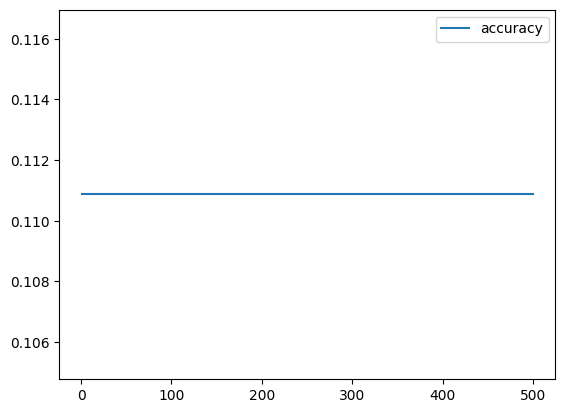

In [38]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()